In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.io import loadmat

import IERS_functions as IERS

#### Make sure Signal Files were correctly copied from ERS folder

In [8]:

# Defining parameters

student_number = 5381827
student_number = list(str(student_number))
for i in range(len(student_number)):
    student_number[i] = int(student_number[i])
A, B, C, D, E, F, G = student_number


#g = 9.81                    # Gravitational acceleration [m/s^2]
xi = 0.040 + C * 1e-3        # Damping ratio []

In [9]:
'''
--------------------------------------------------------------------------
(c) TU Delft
This is the main script that will assist the student on how to answer 
question 2 of Part 2 of the assignment

It loads the horizontal component of a ground acceleration signal from 
the directory: 'Python for Project Work SRE_Part 2/IERS/Signal'. The folder Signal
is initially empty. The student has to put there signals from the previous
question.

Following that, the script calculates the elastic response spectrum, the
indirect inelastic rersponse spectrum (by applying the Newmark-Hall (1982) 
Ry – mu – Tn relationshipe) and the direct inelasic response spectrum.

The solver that is used to calculate the response of the elastic and the
elastoplasic SDoF systems is the Newmark beta integration.
The student is asked to complete the script by filling in the lines
indicated by "<----fill in equation here".

You will have to write your own code for plotting purposes.
--------------------------------------------------------------------------
                         initialisation 
--------------------------------------------------------------------------

One can choose for 'file' either 1 or 2, etc. , such that a specific signal
will be analysed.

Note that the student may have to make changes to the code in order to answer the various questions.
'''

file = 1                                          # <------ fill in equation here

FilePath = 'Signal'
FilePath_full = './' + FilePath + '/'
FilePath_contents = os.listdir(FilePath_full)
FileName = FilePath_full + FilePath_contents[file-1]
fileID = open(FileName, 'r')
info = np.loadtxt(fileID)

NPTS = len(info[:,0])
Dt = info[1,0]
ag_time = info[:,1]


'''
Calls the function that calculates the elastic response spectrum.
The student is advised to open the function and have a look at it.
The student has to specify the damping ratio "xi" based on Assignment 3
instructions.
'''
xi = xi                                   # <------ fill in equation here
SA_el,F_el =  IERS.fnc_Elastic_Response_Spectrum(ag_time,Dt,NPTS,xi)

'''
--------------------------------------------------------------------------
                         Question 2
--------------------------------------------------------------------------
Here the student is asked to calculate the constant ductilty inelastic
acceleration spectra in two ways:
    1) indirect way, by applying the Newmark-Hall (1982) Ry – mu – Tn
    relationship on the Elastic acceleration reponse spectrum
    2) direct way, following the steps of the iterative procedure
First of all the student has to specify the "mu"
'''
mu = np.max([1.7+0.01*D, 1.7+0.01*F])                    # <------ fill in equation here

'''
-- Indirect inelastic acceleration response spectrum --
In the following lines fill in the
quantities of the branched of Ry that are missing (Newmark-Hall Ry – mu – Tn relationship (1982))

Please create the function that defines the value of Ry
'''

# initialisation 
Tn = np.zeros(201)
Ry = np.zeros(201)

for i in range(201):
    Tn[i] = (i-1) * 0.02
    if Tn[i] <= 0.05:
        Ry[i] = 1                   # <------ fill in equation here 
    elif Tn[i] > 0.05 and Tn[i] <= 0.12:
        Ry[i] = 1 + ((np.sqrt(2*mu-1)-1)/(0.12-0.05))*(Tn[i]-0.05)  # linearly interpolate between 0.05-12s
    elif Tn[i] > 0.12 and Tn[i] <= 0.5:
        Ry[i] = np.sqrt(2*mu-1)
    elif Tn[i] > 0.5 and Tn[i] <= 1:
        Ry[i] = np.sqrt(2*mu-1)               # <------ fill in equation here
    elif Tn[i] > 1:
        Ry[i] = mu                   # <------ fill in equation here

# Calculation of indirect inelastic acceleration response spectrum as a
# function of the elastic response spectrum derived previously.
SA_in_ind = np.zeros(201)

for i in range(201):
    SA_in_ind[i] = SA_el[i]/Ry[i]                 # <------ fill in equation here

'''
-- Direct inelastic acceleration response spectrum
The following Python function calculates the direct inelastic response spectrum for the chosen time history
'''
SA_in_dir =  IERS.fnc_Direct_Inel_Resp_Spec(ag_time,Dt,NPTS,xi,mu,SA_el,F_el);




Calculating for Tn = 0.02
Calculating for Tn = 0.04
Calculating for Tn = 0.06
Calculating for Tn = 0.08
Calculating for Tn = 0.1
Calculating for Tn = 0.12
Calculating for Tn = 0.14
Calculating for Tn = 0.16
Calculating for Tn = 0.18
Calculating for Tn = 0.2
Calculating for Tn = 0.22
Calculating for Tn = 0.24
Calculating for Tn = 0.26
Calculating for Tn = 0.28
Calculating for Tn = 0.3
Calculating for Tn = 0.32
Calculating for Tn = 0.34
Calculating for Tn = 0.36
Calculating for Tn = 0.38
Calculating for Tn = 0.4
Calculating for Tn = 0.42
Calculating for Tn = 0.44
Calculating for Tn = 0.46
Calculating for Tn = 0.48
Calculating for Tn = 0.5
Calculating for Tn = 0.52
Calculating for Tn = 0.54
Calculating for Tn = 0.56
Calculating for Tn = 0.58
Calculating for Tn = 0.6
Calculating for Tn = 0.62
Calculating for Tn = 0.64
Calculating for Tn = 0.66
Calculating for Tn = 0.68
Calculating for Tn = 0.7000000000000001
Calculating for Tn = 0.72
Calculating for Tn = 0.74
Calculating for Tn = 0.76
Calc

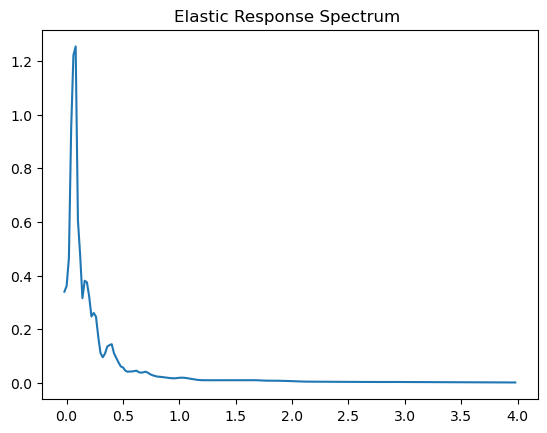

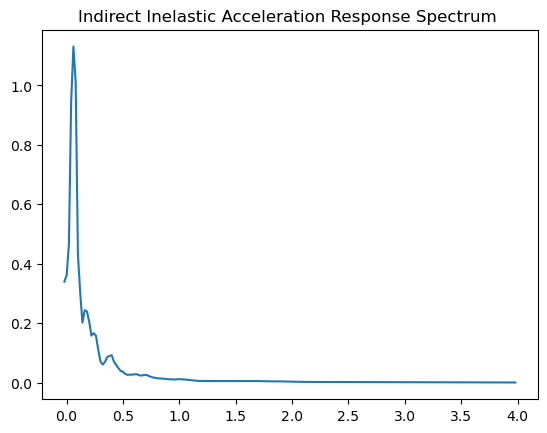

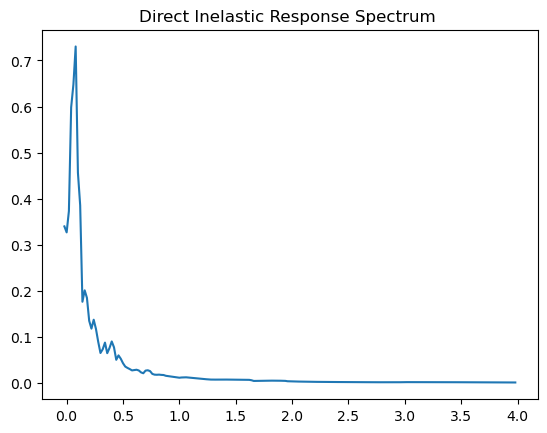

In [11]:
plt.plot(Tn,SA_el)
plt.title("Elastic Response Spectrum ")
plt.show()

plt.plot(Tn,SA_in_ind)
plt.title("Indirect Inelastic Acceleration Response Spectrum ")
plt.show()

plt.plot(Tn,SA_in_dir)
plt.title("Direct Inelastic Response Spectrum ")
plt.show()